In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import japanize_matplotlib
from pathlib import Path

# 現在のノートブックからの相対パスを絶対パスに変換
notebook_dir = Path(os.path.abspath('')).parent
data_path = notebook_dir / 'data' / 'processed' / 'wt262avs.adicht_rec2.parquet'

# データの読み込み
df = pd.read_parquet(data_path)

# データの先頭を表示
print("DataFrameの先頭5行:")
display(df.head())

# データの基本情報を表示
print("\nDataFrameの基本情報:")
display(df.info())

DataFrameの先頭5行:


PFC       PPC         A1         V1  Stimulus  Time_s  Event_ID  \
0  63.68750 -48.06250 -76.906250 -55.328125 -0.000312   0.000         0   
1  42.40625 -50.87500 -80.546875 -57.750000 -0.000312   0.001         0   
2  31.43750 -70.71875 -99.937500 -82.546875 -0.000312   0.002         0   
3  30.37500 -44.06250 -70.140625 -49.937500 -0.000312   0.003         0   
4  -4.53125 -58.40625 -88.937500 -58.468750  0.000000   0.004         0   

  Stimulus_Type  
0   No_Stimulus  
1   No_Stimulus  
2   No_Stimulus  
3   No_Stimulus  
4   No_Stimulus


DataFrameの基本情報:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240450 entries, 0 to 4240449
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   PFC            float32
 1   PPC            float32
 2   A1             float32
 3   V1             float32
 4   Stimulus       float32
 5   Time_s         float64
 6   Event_ID       int64  
 7   Stimulus_Type  object 
dtypes: float32(5), float64(1), int64(1), object(1)
memory usage: 177.9+ MB


None

刺激タイプごとの回数:


Stimulus_Type
Light          299975
Sound          299876
Light+Sound    299544
Name: count, dtype: int64

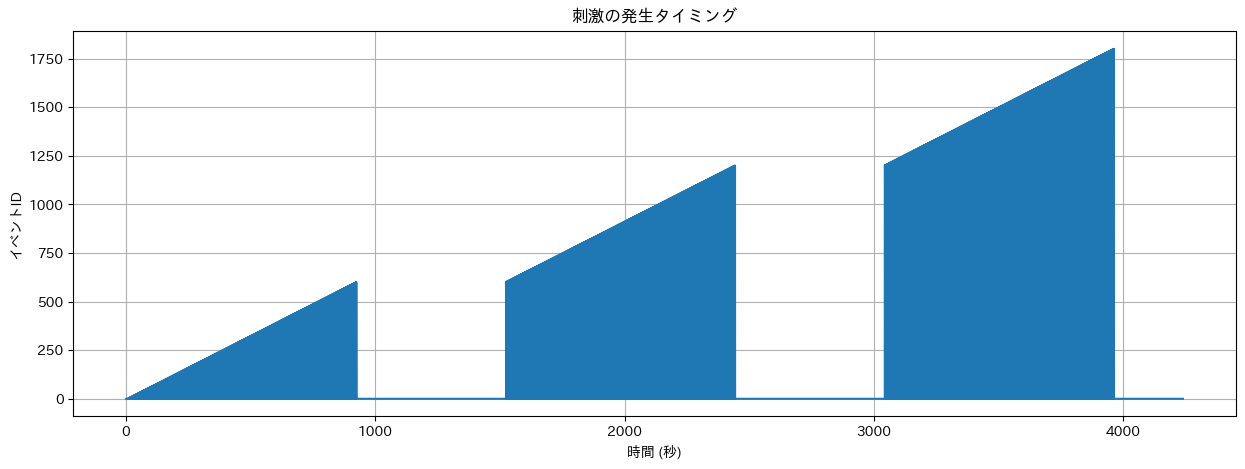

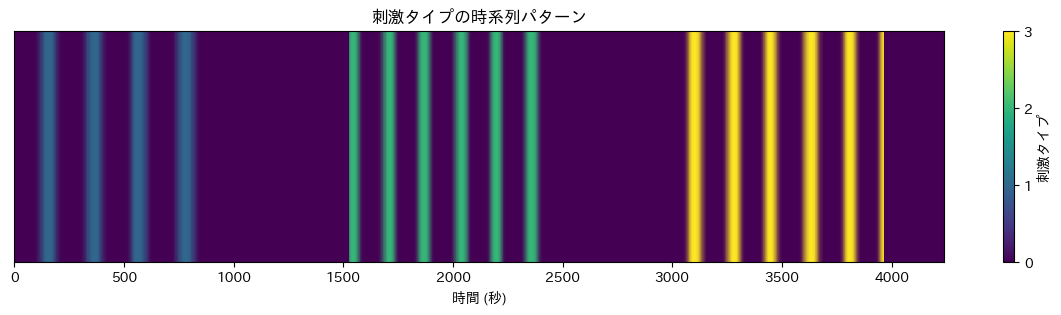

In [3]:
import matplotlib.pyplot as plt
import japanize_matplotlib # 日本語表示のため


# 刺激タイプごとの回数を集計
stimulus_counts = df[df['Stimulus_Type'] != 'No_Stimulus']['Stimulus_Type'].value_counts()
print("刺激タイプごとの回数:")
display(stimulus_counts)

# --- 修正箇所②: 2つ目のグラフを修正 ---
# 刺激の発生タイミングを可視化
plt.figure(figsize=(15, 5))
# X軸にdf.indexの代わりに、計算した時間(秒)を指定
plt.plot(df['Time_s'], df['Event_ID']) 
plt.title('刺激の発生タイミング')
# X軸のラベルを「秒」に変更
plt.xlabel('時間 (秒)') 
plt.ylabel('イベントID')
plt.grid(True)
plt.show()

# --- 修正箇所③: 3つ目のグラフ（ヒートマップ）を修正 ---
# 刺激タイプごとの発生タイミングをヒートマップで表示
stimulus_type_map = {'Light': 1, 'Sound': 2, 'Light+Sound': 3, 'No_Stimulus': 0}
df['Stimulus_Type_Numeric'] = df['Stimulus_Type'].map(stimulus_type_map)

plt.figure(figsize=(15, 3))
# imshowのextentパラメータでX軸の範囲を秒単位で指定
# [X軸の開始, X軸の終了, Y軸の開始, Y軸の終了]
plt.imshow([df['Stimulus_Type_Numeric']], aspect='auto', cmap='viridis', 
           extent=[df['Time_s'].iloc[0], df['Time_s'].iloc[-1], 0, 1])
plt.title('刺激タイプの時系列パターン')
# X軸のラベルを「秒」に変更
plt.xlabel('時間 (秒)')
plt.colorbar(ticks=[0, 1, 2, 3], label='刺激タイプ')
plt.yticks([])
plt.show()

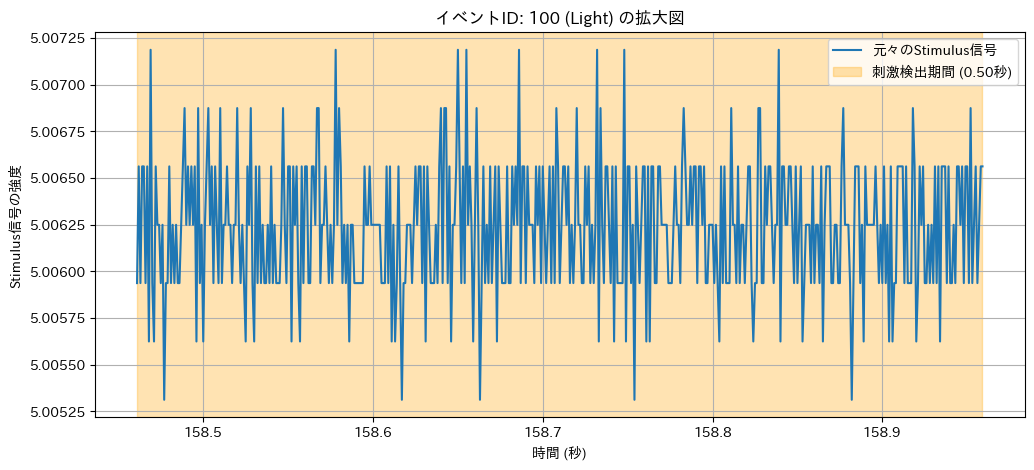

In [23]:
import matplotlib.pyplot as plt
import japanize_matplotlib

# --- 確認したいイベントIDを指定 ---
target_event_id = 100 # 例えば100番目のイベントを見てみる

# 対象イベントの期間だけデータを抽出
event_df = df[df['Event_ID'] == target_event_id]

# イベントの開始時刻と終了時刻を取得
start_time = event_df['Time_s'].iloc[0]
end_time = event_df['Time_s'].iloc[-1]
stim_type = event_df['Stimulus_Type'].iloc[0]

# グラフ描画
plt.figure(figsize=(12, 5))
plt.plot(event_df['Time_s'], event_df['Stimulus'], label='元々のStimulus信号')
plt.title(f'イベントID: {target_event_id} ({stim_type}) の拡大図')
plt.xlabel('時間 (秒)')
plt.ylabel('Stimulus信号の強度')
plt.axvspan(start_time, end_time, color='orange', alpha=0.3, label=f'刺激検出期間 ({end_time - start_time:.2f}秒)')
plt.legend()
plt.grid(True)
plt.show()


イベントID 1 の波形:


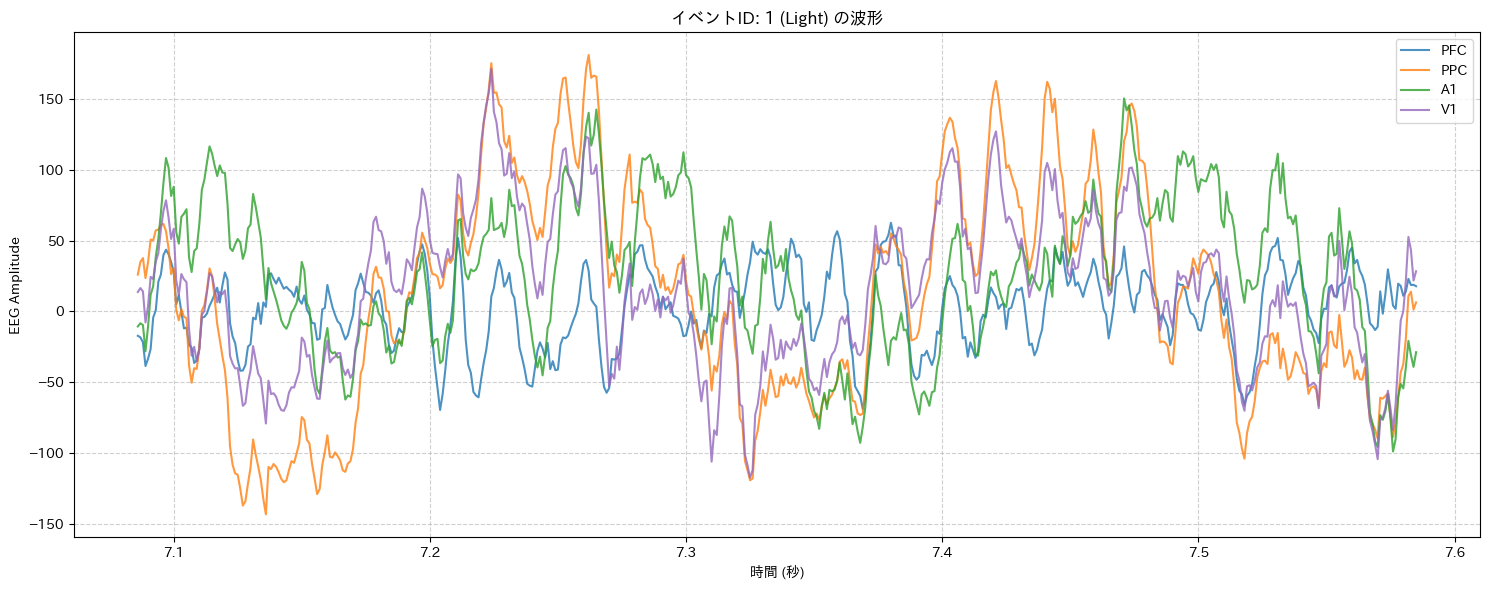


イベントID 601 の波形:


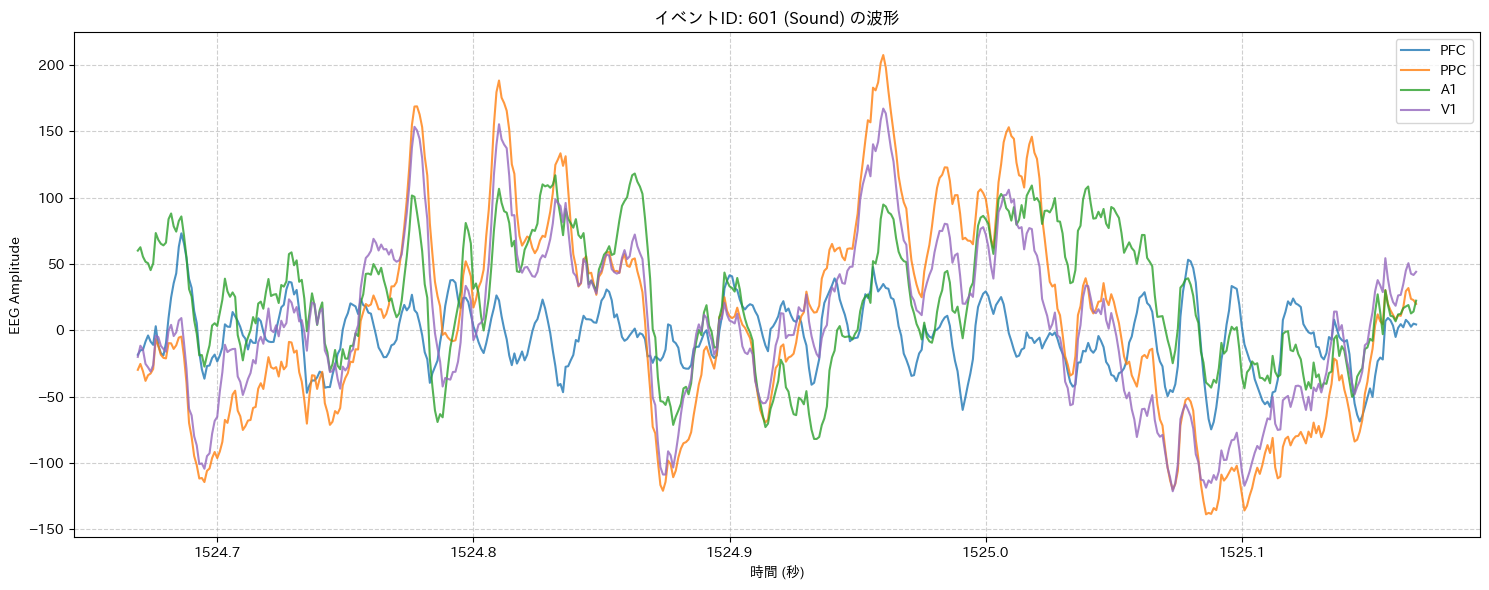


イベントID 1201 の波形:


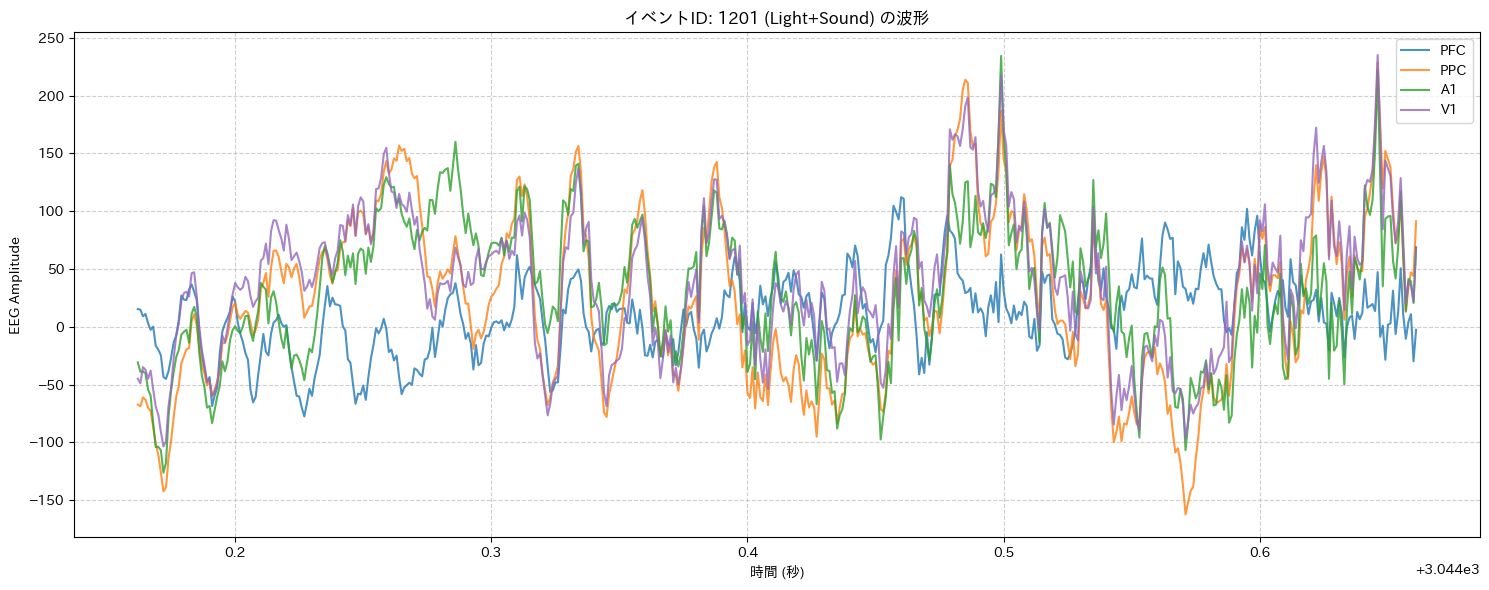

In [26]:
import matplotlib.pyplot as plt
import japanize_matplotlib # 日本語表示のため

# 特定の刺激イベントの波形を可視化する関数（修正版）
def plot_event_waveform(df, event_id):
    """
    指定されたイベントIDの期間のみを抽出し、
    EEG 4チャネルとStimulus信号を1つのグラフにまとめてプロットする。
    """
    # イベントIDに該当する区間のデータを抽出
    event_df = df[df['Event_ID'] == event_id]
    
    # イベントIDが見つからない場合はメッセージを表示して終了
    if event_df.empty:
        print(f"イベントID {event_id} は見つかりませんでした。")
        return
        
    stim_type = event_df['Stimulus_Type'].iloc[0]
    
    # --- グラフ描画 ---
    fig, ax1 = plt.subplots(figsize=(15, 6))
    
    # --- EEGチャネルのプロット (左のY軸) ---
    eeg_channels = ['PFC', 'PPC', 'A1', 'V1']
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd'] # チャネルごとの色
    
    for i, channel in enumerate(eeg_channels):
        ax1.plot(event_df['Time_s'], event_df[channel], label=channel, color=colors[i], alpha=0.8)
    
    ax1.set_xlabel('時間 (秒)')
    ax1.set_ylabel('EEG Amplitude', color='black')
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.grid(True, linestyle='--', alpha=0.6)

    
    # --- 仕上げ ---
    plt.title(f'イベントID: {event_id} ({stim_type}) の波形')
    
    # 凡例をまとめて表示
    lines1, labels1 = ax1.get_legend_handles_labels()
    ax1.legend(lines1, labels1, loc='upper right')
    fig.tight_layout() # レイアウトを自動調整
    plt.show()


# 1回目(Light)、601回目(Sound)、1201回目(Light+Sound)の刺激の波形を表示
target_events = [1, 601, 1201]
for event_id in target_events:
    print(f"\nイベントID {event_id} の波形:")
    plot_event_waveform(df, event_id)


イベントID 1 の波形:


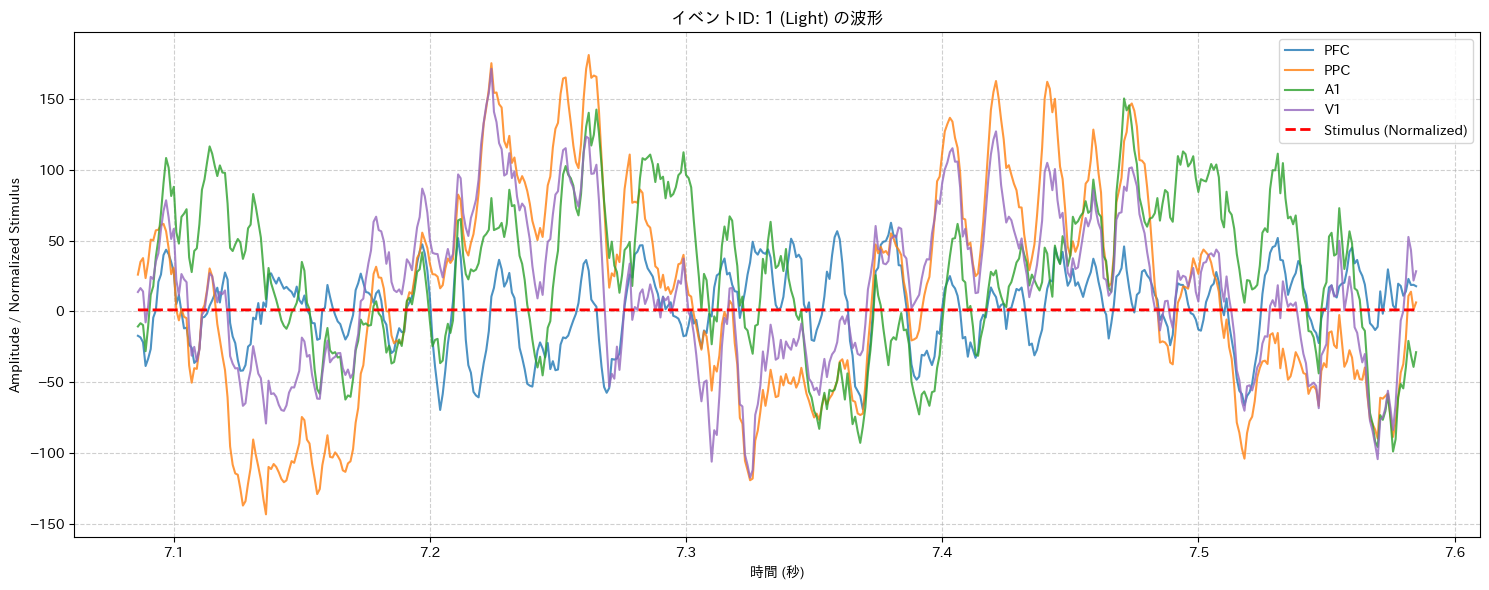


イベントID 601 の波形:


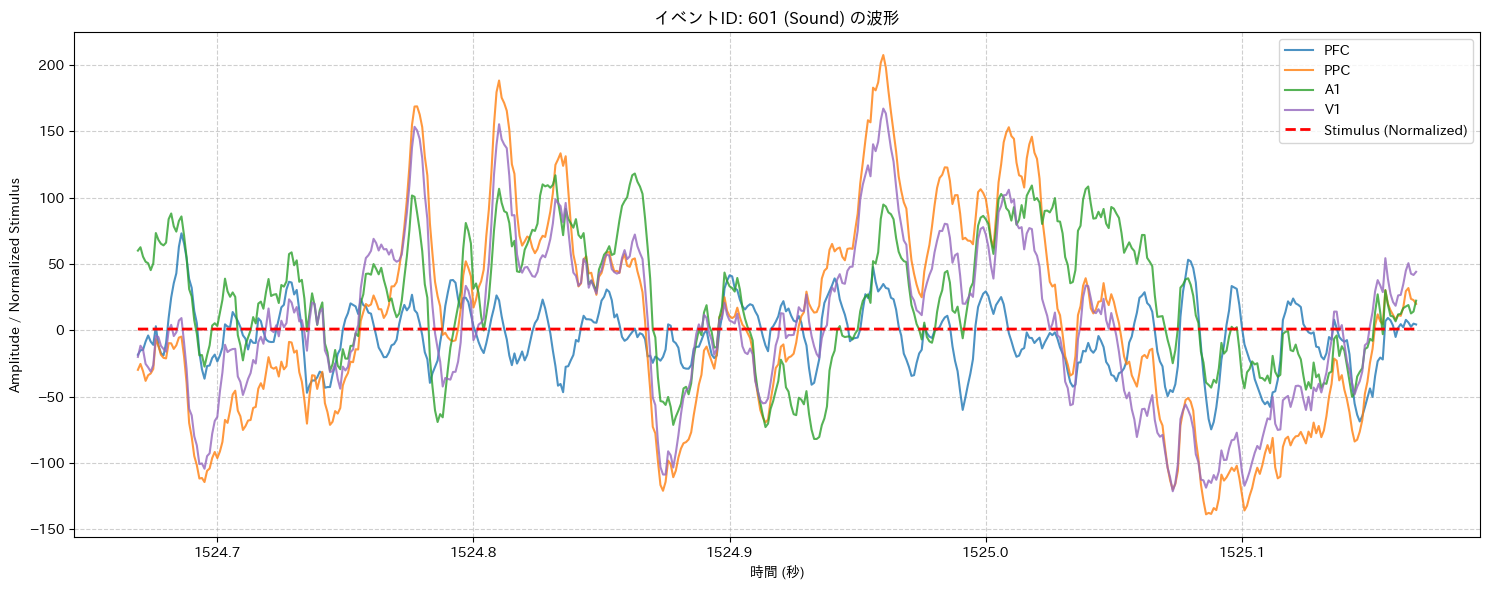


イベントID 1201 の波形:


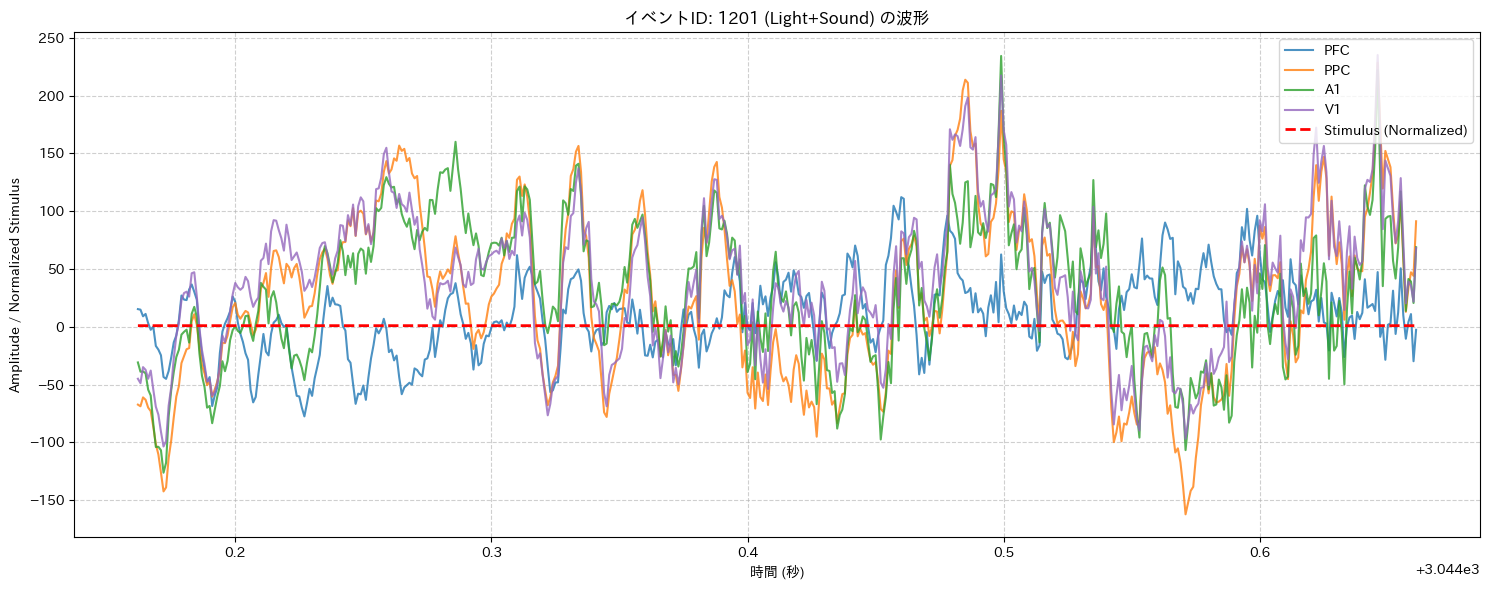

In [30]:
import matplotlib.pyplot as plt
import japanize_matplotlib # 日本語表示のため
from sklearn.preprocessing import MinMaxScaler # 正規化のために追加

# 特定の刺激イベントの波形を可視化する関数（修正版）
def plot_event_waveform(df, event_id):
    """
    指定されたイベントIDの期間のみを抽出し、
    EEG 4チャネルと正規化されたStimulus信号を1つのグラフにまとめてプロットする。
    """
    # イベントIDに該当する区間のデータを抽出
    event_df = df[df['Event_ID'] == event_id].copy() # Warning回避のため.copy()を追加
    
    # イベントIDが見つからない場合はメッセージを表示して終了
    if event_df.empty:
        print(f"イベントID {event_id} は見つかりませんでした。")
        return
        
    stim_type = event_df['Stimulus_Type'].iloc[0]
    
    # --- Stimulus信号の正規化 ---
    # MinMaxScalerを使用してStimulus信号を0-1の範囲に正規化
    # イベント期間だけでなく、全体のStimulus信号でfitすると比較しやすいため
    # df全体でMinMaxScalerを初期化し、event_dfに適用
    scaler = MinMaxScaler()
    scaler.fit(df[['Stimulus']]) # df全体のStimulus列でスケールを学習
    event_df['Stimulus_Normalized'] = scaler.transform(event_df[['Stimulus']])
    
    # --- グラフ描画 ---
    plt.figure(figsize=(15, 6))
    
    # --- EEGチャネルのプロット ---
    eeg_channels = ['PFC', 'PPC', 'A1', 'V1']
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd'] # EEGチャネルごとの色
    
    for i, channel in enumerate(eeg_channels):
        plt.plot(event_df['Time_s'], event_df[channel], label=channel, color=colors[i], alpha=0.8)
    
    # --- 正規化されたStimulus信号のプロット ---
    # EEG信号と同じ軸にプロットするが、区別しやすいようにスタイルを変更
    plt.plot(event_df['Time_s'], event_df['Stimulus_Normalized'], 
             label='Stimulus (Normalized)', color='red', linestyle='--', linewidth=2)
    
    plt.xlabel('時間 (秒)')
    plt.ylabel('Amplitude / Normalized Stimulus', color='black') # Y軸ラベルを修正
    plt.tick_params(axis='y', labelcolor='black')
    plt.grid(True, linestyle='--', alpha=0.6)

    # --- 仕上げ ---
    plt.title(f'イベントID: {event_id} ({stim_type}) の波形')
    
    # 凡例をまとめて表示
    plt.legend(loc='upper right')
    plt.tight_layout() # レイアウトを自動調整
    plt.show()


# 1回目(Light)、601回目(Sound)、1201回目(Light+Sound)の刺激の波形を表示
target_events = [1, 601, 1201]
for event_id in target_events:
    print(f"\nイベントID {event_id} の波形:")
    plot_event_waveform(df, event_id)


イベントID 1 の波形:


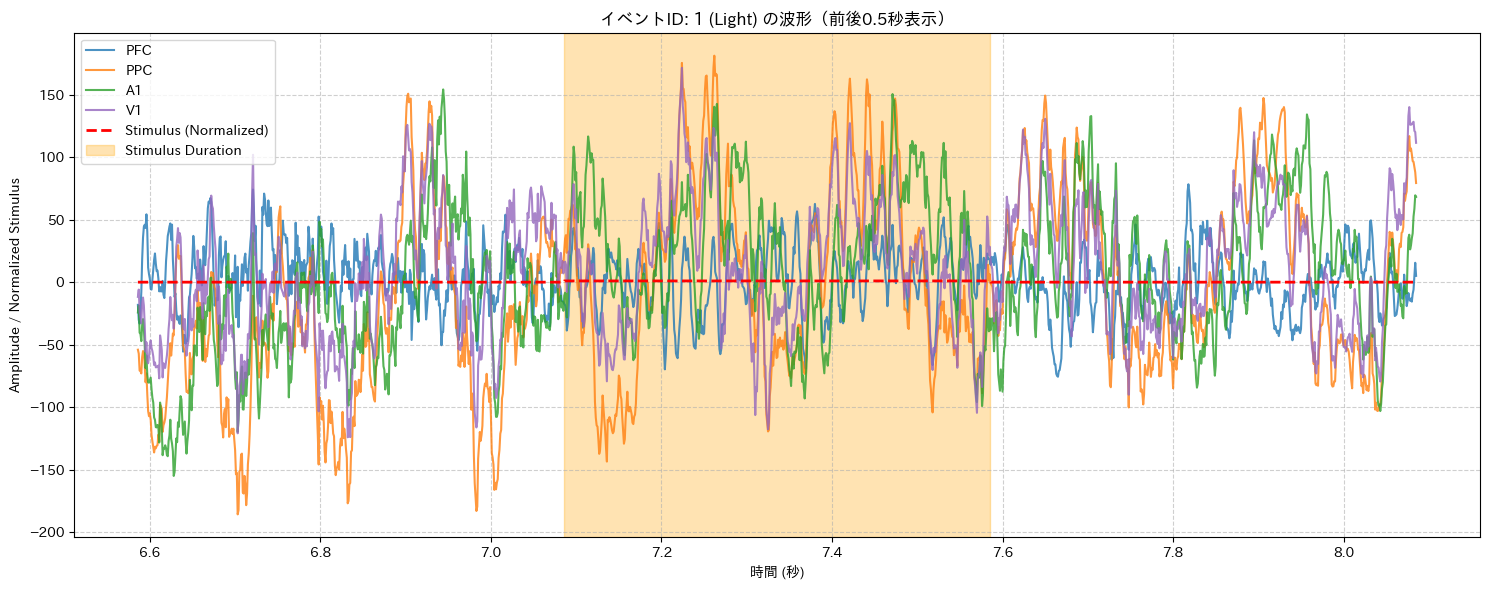


イベントID 601 の波形:


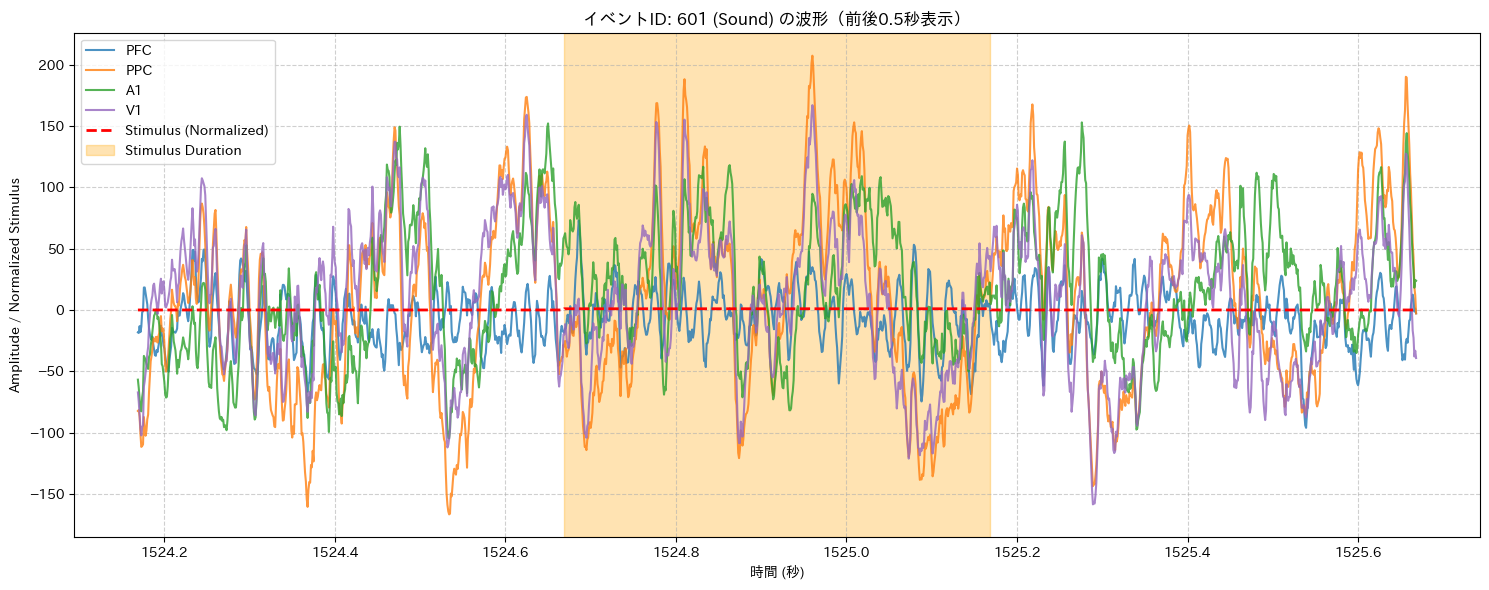


イベントID 1201 の波形:


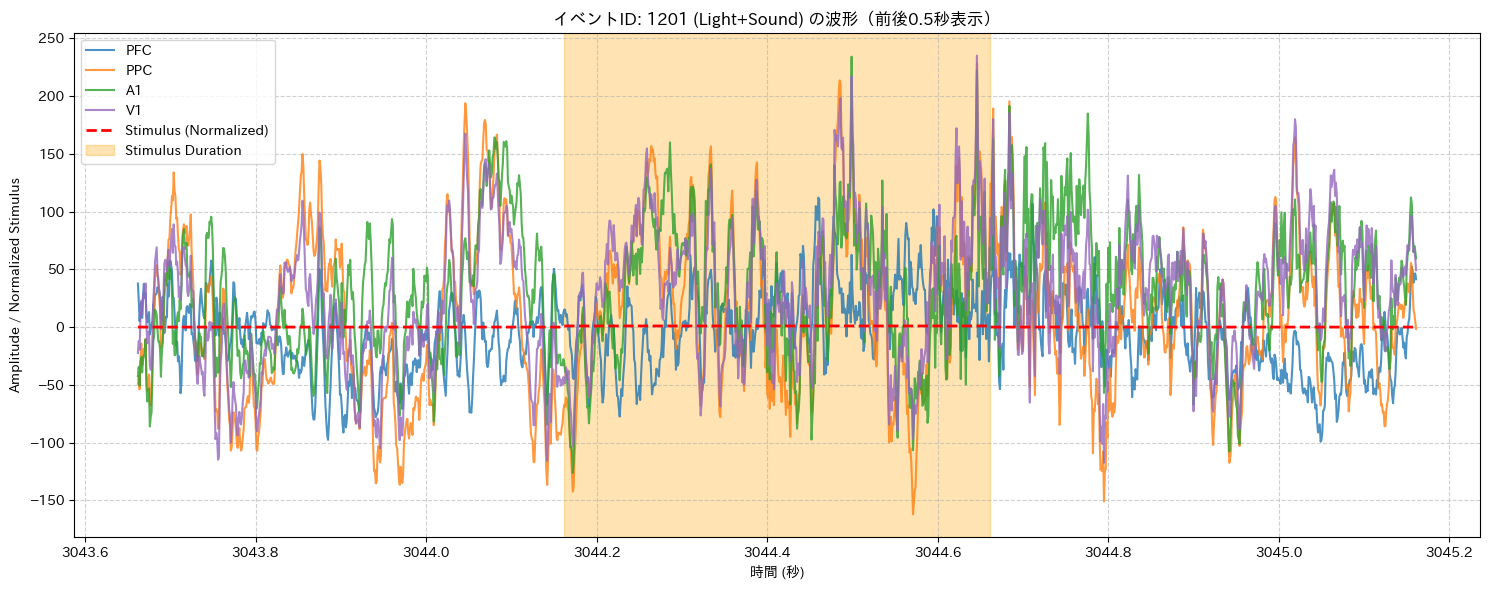

In [33]:
import matplotlib.pyplot as plt
import japanize_matplotlib # 日本語表示のため
from sklearn.preprocessing import MinMaxScaler # 正規化のため

# 特定の刺激イベントの波形を可視化する関数（修正版）
def plot_event_waveform(df, event_id, pre_event_s=0.5, post_event_s=0.5):
    """
    指定されたイベントIDの前後期間を含めて波形をプロットする。
    実際の刺激期間は背景色でハイライトする。
    """
    # イベントIDに該当する区間のデータを抽出
    event_df = df[df['Event_ID'] == event_id]
    
    # イベントIDが見つからない場合はメッセージを表示して終了
    if event_df.empty:
        print(f"イベントID {event_id} は見つかりませんでした。")
        return
        
    stim_type = event_df['Stimulus_Type'].iloc[0]
    
    # --- 表示範囲を計算 ---
    # 実際のイベント開始・終了時刻を取得
    event_start_time = event_df['Time_s'].iloc[0]
    event_end_time = event_df['Time_s'].iloc[-1]
    
    # 前後を含めたプロット範囲の開始・終了時刻を計算
    plot_start_time = event_start_time - pre_event_s
    plot_end_time = event_end_time + post_event_s
    
    # プロット範囲のデータを抽出
    plot_df = df[(df['Time_s'] >= plot_start_time) & (df['Time_s'] <= plot_end_time)].copy()

    # --- Stimulus信号の正規化 ---
    scaler = MinMaxScaler()
    scaler.fit(df[['Stimulus']])
    plot_df['Stimulus_Normalized'] = scaler.transform(plot_df[['Stimulus']])
    
    # --- グラフ描画 ---
    plt.figure(figsize=(15, 6))
    
    # --- EEGチャネルのプロット ---
    eeg_channels = ['PFC', 'PPC', 'A1', 'V1']
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd']
    
    for i, channel in enumerate(eeg_channels):
        plt.plot(plot_df['Time_s'], plot_df[channel], label=channel, color=colors[i], alpha=0.8)
    
    # --- 正規化されたStimulus信号のプロット ---
    plt.plot(plot_df['Time_s'], plot_df['Stimulus_Normalized'], 
             label='Stimulus (Normalized)', color='red', linestyle='--', linewidth=2)
    
    # ★★★ 変更点: 刺激期間を背景色でハイライト ★★★
    plt.axvspan(event_start_time, event_end_time, color='orange', alpha=0.3, label='Stimulus Duration')
    
    plt.xlabel('時間 (秒)')
    plt.ylabel('Amplitude / Normalized Stimulus')
    plt.grid(True, linestyle='--', alpha=0.6)

    # --- 仕上げ ---
    plt.title(f'イベントID: {event_id} ({stim_type}) の波形（前後0.5秒表示）')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()


# 1回目(Light)、601回目(Sound)、1201回目(Light+Sound)の刺激の波形を表示
target_events = [1, 601, 1201]
for event_id in target_events:
    print(f"\nイベントID {event_id} の波形:")
    # デフォルトで前後0.5秒ずつ表示
    plot_event_waveform(df, event_id)


イベントID 1 の波形:


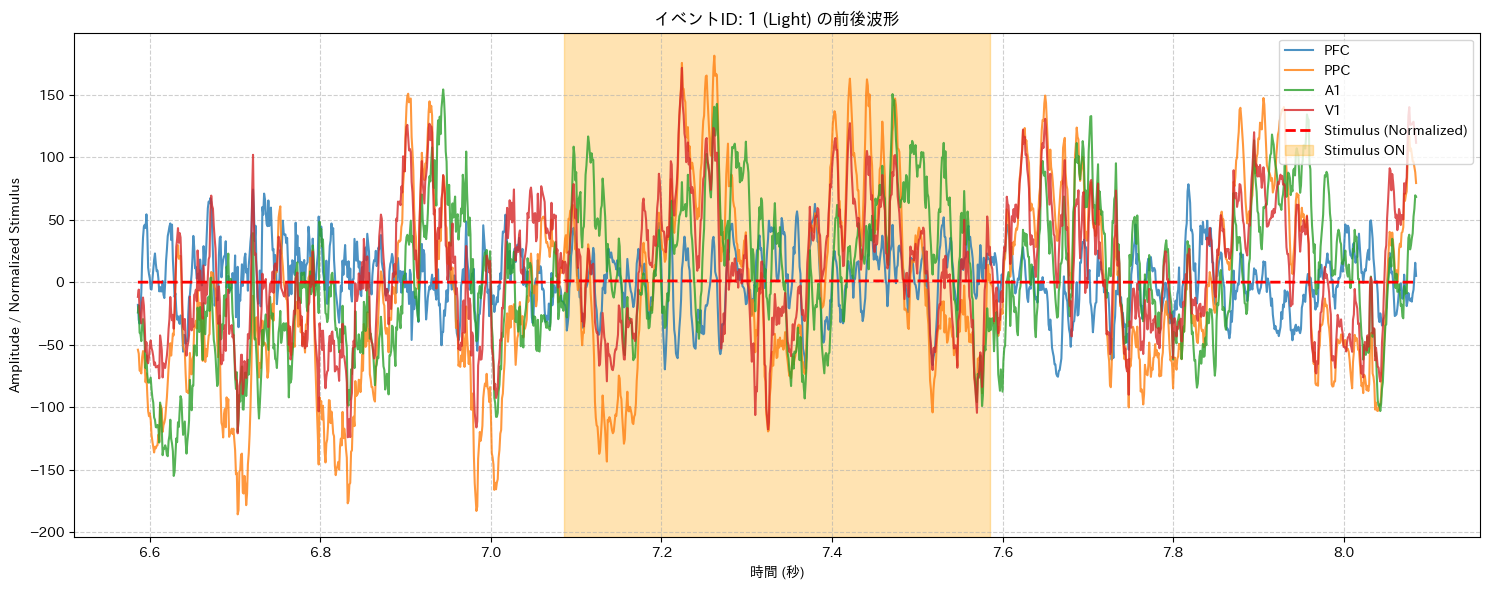


イベントID 601 の波形:


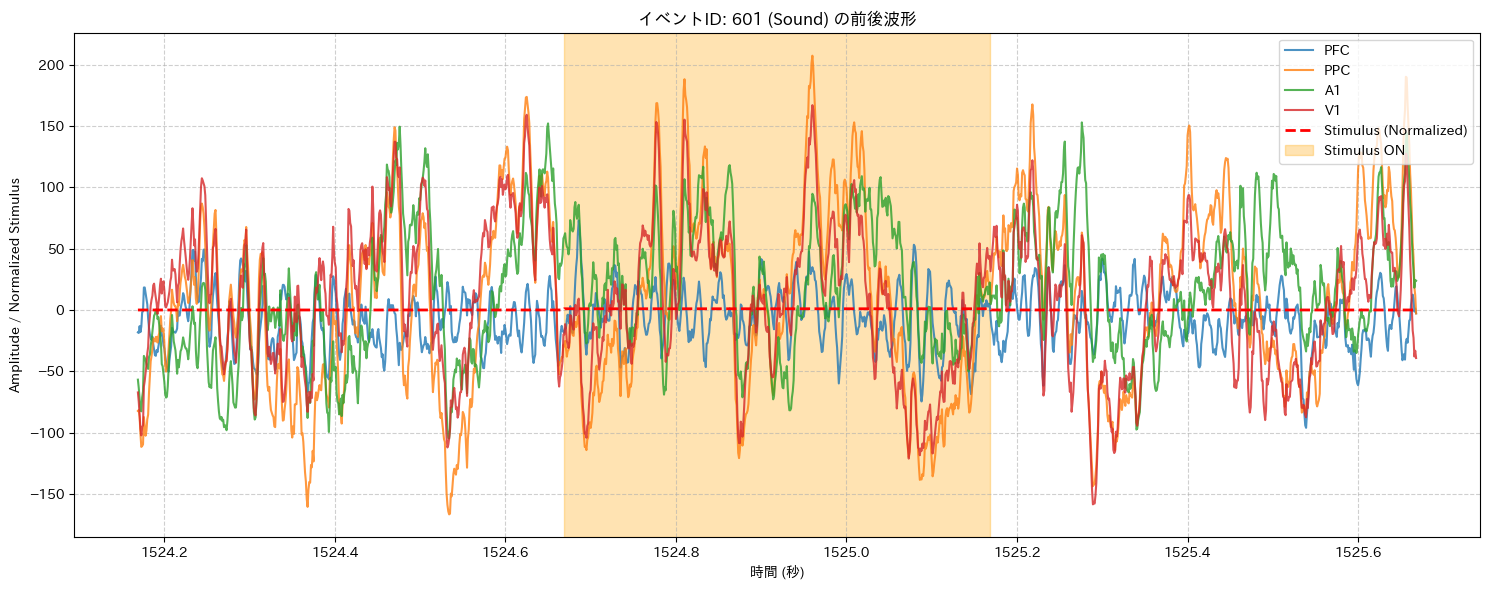


イベントID 1201 の波形:


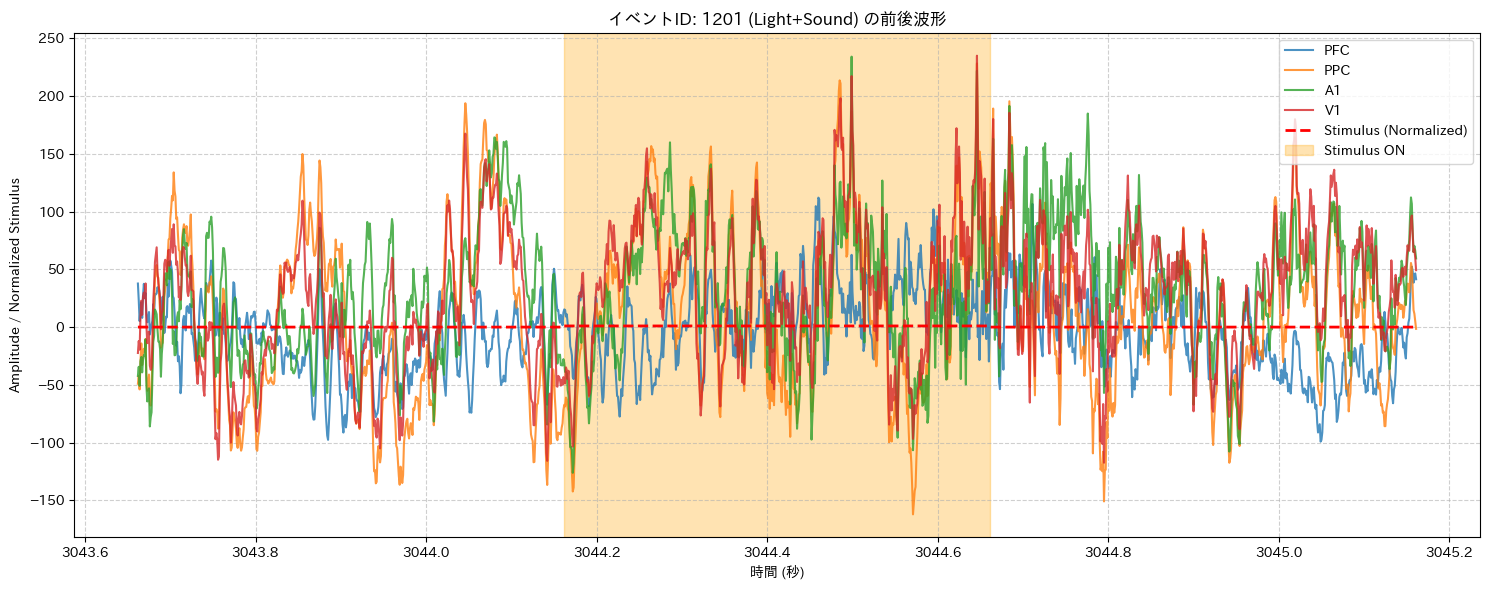

In [36]:
import matplotlib.pyplot as plt
import japanize_matplotlib # 日本語表示のため
from sklearn.preprocessing import MinMaxScaler

# 特定の刺激イベントの波形を可視化する関数（前後区間を含む修正版）
def plot_event_waveform_with_context(df, event_id, pre_event_ms=500, post_event_ms=500):
    """
    指定されたイベントIDの前後区間を含めて波形をプロットする。
    刺激区間は背景色で示す。
    """
    # イベントIDに該当する区間のデータを抽出
    event_df = df[df['Event_ID'] == event_id]
    
    if event_df.empty:
        print(f"イベントID {event_id} は見つかりませんでした。")
        return
        
    # イベントの開始・終了インデックスと時間を取得
    event_start_idx = event_df.index[0]
    event_end_idx = event_df.index[-1]
    event_start_time = event_df['Time_s'].iloc[0]
    event_end_time = event_df['Time_s'].iloc[-1]
    stim_type = event_df['Stimulus_Type'].iloc[0]

    # --- プロットする全体の範囲を決定 ---
    # サンプリングレートが1000Hzなので、ms = データポイント数
    plot_start_idx = max(0, event_start_idx - pre_event_ms)
    plot_end_idx = min(len(df) - 1, event_end_idx + post_event_ms)
    
    # プロット用のDataFrameを切り出す
    plot_df = df.loc[plot_start_idx:plot_end_idx].copy()
    
    # --- Stimulus信号の正規化 ---
    scaler = MinMaxScaler()
    scaler.fit(df[['Stimulus']]) # 全体データでスケールを学習
    plot_df['Stimulus_Normalized'] = scaler.transform(plot_df[['Stimulus']])
    
    # --- グラフ描画 ---
    plt.figure(figsize=(15, 6))
    
    # --- EEGチャネルのプロット ---
    eeg_channels = ['PFC', 'PPC', 'A1', 'V1']
    for channel in eeg_channels:
        plt.plot(plot_df['Time_s'], plot_df[channel], label=channel, alpha=0.8)
    
    # --- 正規化されたStimulus信号のプロット ---
    plt.plot(plot_df['Time_s'], plot_df['Stimulus_Normalized'], 
             label='Stimulus (Normalized)', color='red', linestyle='--', linewidth=2)

    # --- ★★★ 刺激区間を背景色で明示 ★★★ ---
    plt.axvspan(event_start_time, event_end_time, color='orange', alpha=0.3, label='Stimulus ON')
    
    plt.xlabel('時間 (秒)')
    plt.ylabel('Amplitude / Normalized Stimulus')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.title(f'イベントID: {event_id} ({stim_type}) の前後波形')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()


# 1回目、601回目、1201回目の刺激の波形を表示
target_events = [1, 601, 1201]
for event_id in target_events:
    print(f"\nイベントID {event_id} の波形:")
    # 修正した関数を呼び出す
    plot_event_waveform_with_context(df, event_id)


イベントID 1 の波形:


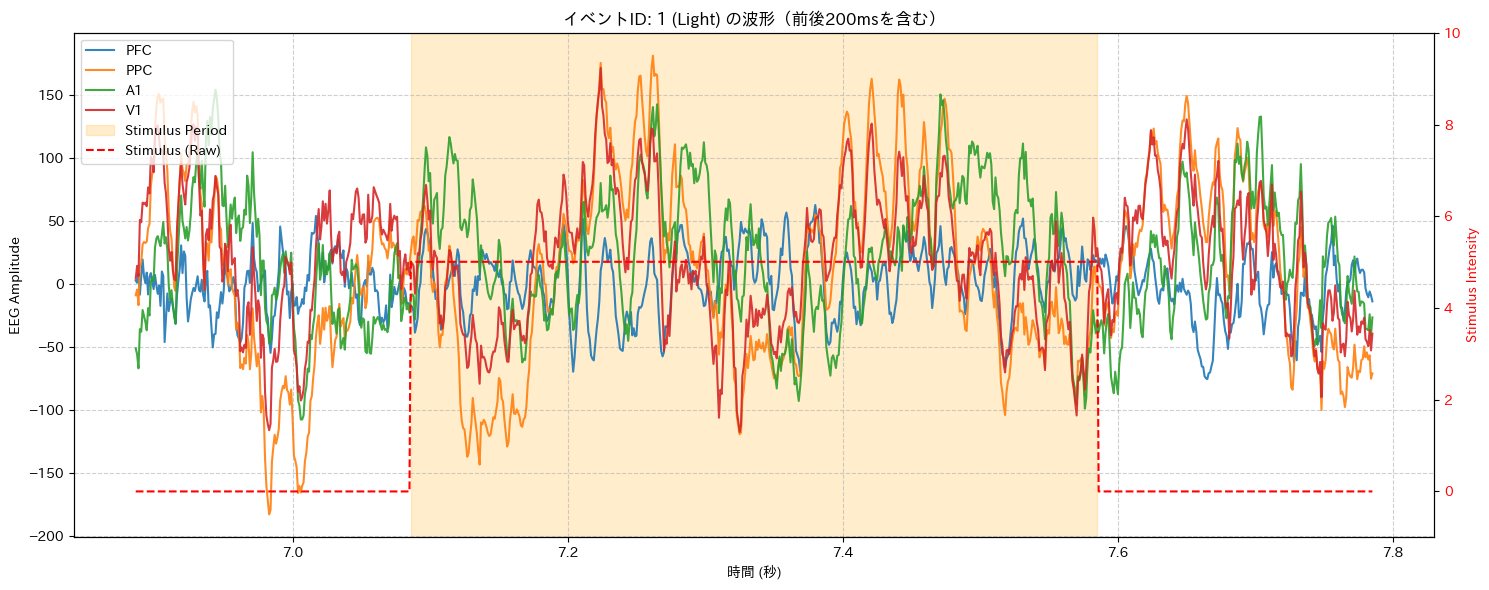


イベントID 601 の波形:


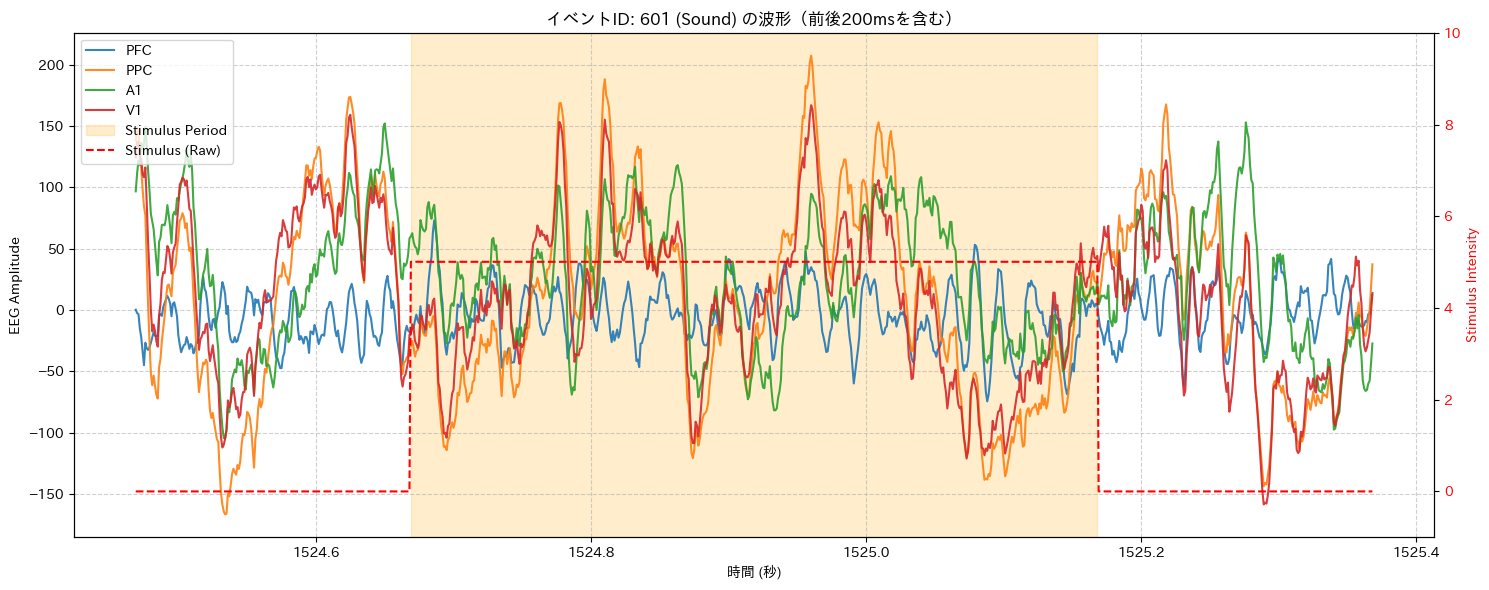


イベントID 1201 の波形:


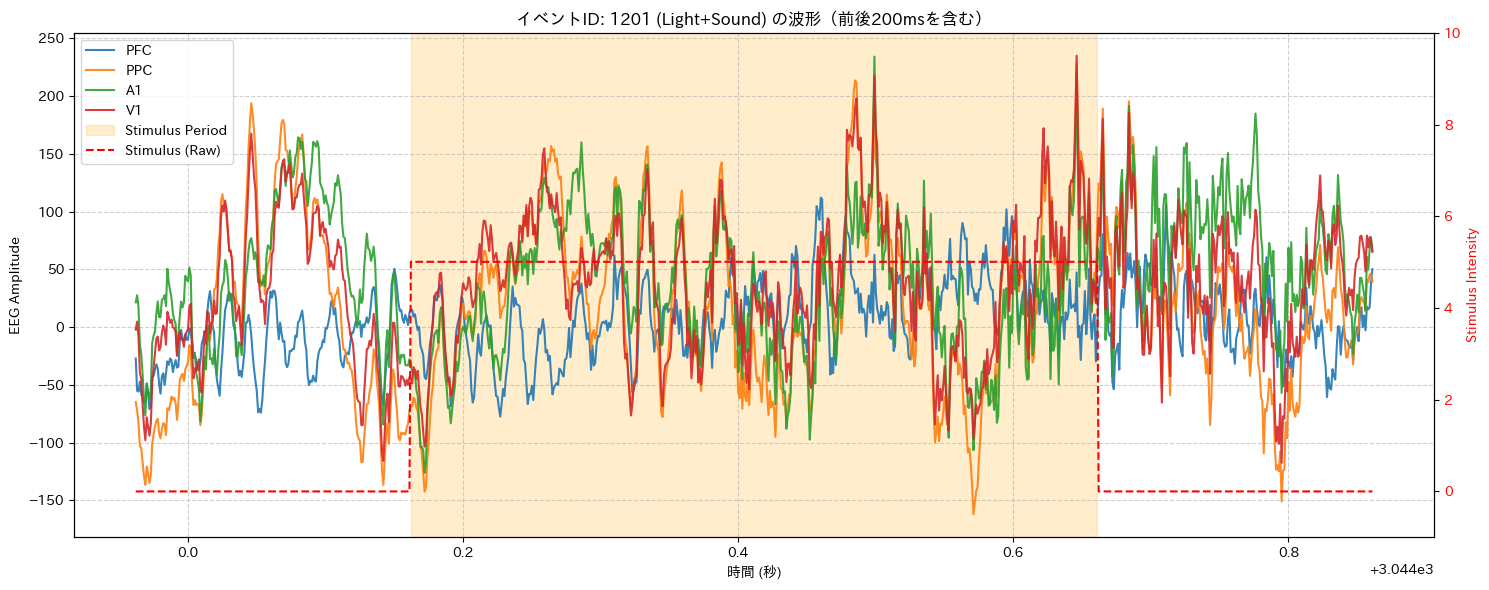

In [37]:
import matplotlib.pyplot as plt
import japanize_matplotlib # 日本語表示のため

# 特定の刺激イベントの波形を可視化する関数（再修正版）
def plot_event_waveform(df, event_id, padding_ms=200):
    """
    指定されたイベントIDの前後区間を含めてプロットする。
    Stimulus信号は第2Y軸に元のスケールで表示する。
    """
    # イベントIDに該当する区間のデータを抽出
    event_df = df[df['Event_ID'] == event_id]
    
    if event_df.empty:
        print(f"イベントID {event_id} は見つかりませんでした。")
        return
        
    stim_type = event_df['Stimulus_Type'].iloc[0]
    
    # --- 変更点①: 前後区間を含めた表示範囲を計算 ---
    # サンプリングレートを1000Hzと仮定
    padding_points = int(padding_ms) # ミリ秒をデータポイント数に変換
    
    # イベントの開始・終了インデックスを取得
    event_start_idx = event_df.index[0]
    event_end_idx = event_df.index[-1]
    
    # プロット範囲のインデックスを計算
    plot_start_idx = max(0, event_start_idx - padding_points)
    plot_end_idx = min(len(df) - 1, event_end_idx + padding_points)
    
    # プロット用のデータをdf全体から切り出す
    plot_df = df.loc[plot_start_idx:plot_end_idx]
    
    # --- グラフ描画 ---
    fig, ax1 = plt.subplots(figsize=(15, 6))
    
    # --- EEGチャネルのプロット (左のY軸) ---
    eeg_channels = ['PFC', 'PPC', 'A1', 'V1']
    for channel in eeg_channels:
        ax1.plot(plot_df['Time_s'], plot_df[channel], label=channel, alpha=0.9)
    
    ax1.set_xlabel('時間 (秒)')
    ax1.set_ylabel('EEG Amplitude', color='black')
    ax1.grid(True, linestyle='--', alpha=0.6)

    # --- 変更点②: Stimulus信号を第2Y軸でプロット ---
    ax2 = ax1.twinx()
    ax2.plot(plot_df['Time_s'], plot_df['Stimulus'], label='Stimulus (Raw)', color='red', linestyle='--')
    ax2.set_ylabel('Stimulus Intensity', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    # StimulusのY軸範囲を少し広げて見やすくする
    ax2.set_ylim(-1, max(df['Stimulus'].max(), 10))


    # --- 変更点③: 実際の刺激区間を背景色でハイライト ---
    event_start_time = event_df['Time_s'].iloc[0]
    event_end_time = event_df['Time_s'].iloc[-1]
    ax1.axvspan(event_start_time, event_end_time, color='orange', alpha=0.2, label='Stimulus Period')

    # --- 仕上げ ---
    plt.title(f'イベントID: {event_id} ({stim_type}) の波形（前後{padding_ms}msを含む）')
    
    # 凡例をまとめて表示
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    
    fig.tight_layout()
    plt.show()


# 1回目(Light)、601回目(Sound)、1201回目(Light+Sound)の刺激の波形を表示
target_events = [1, 601, 1201]
for event_id in target_events:
    print(f"\nイベントID {event_id} の波形:")
    # 前後200ミリ秒を含めて表示
    plot_event_waveform(df, event_id, padding_ms=200)


イベントID 1 の波形:


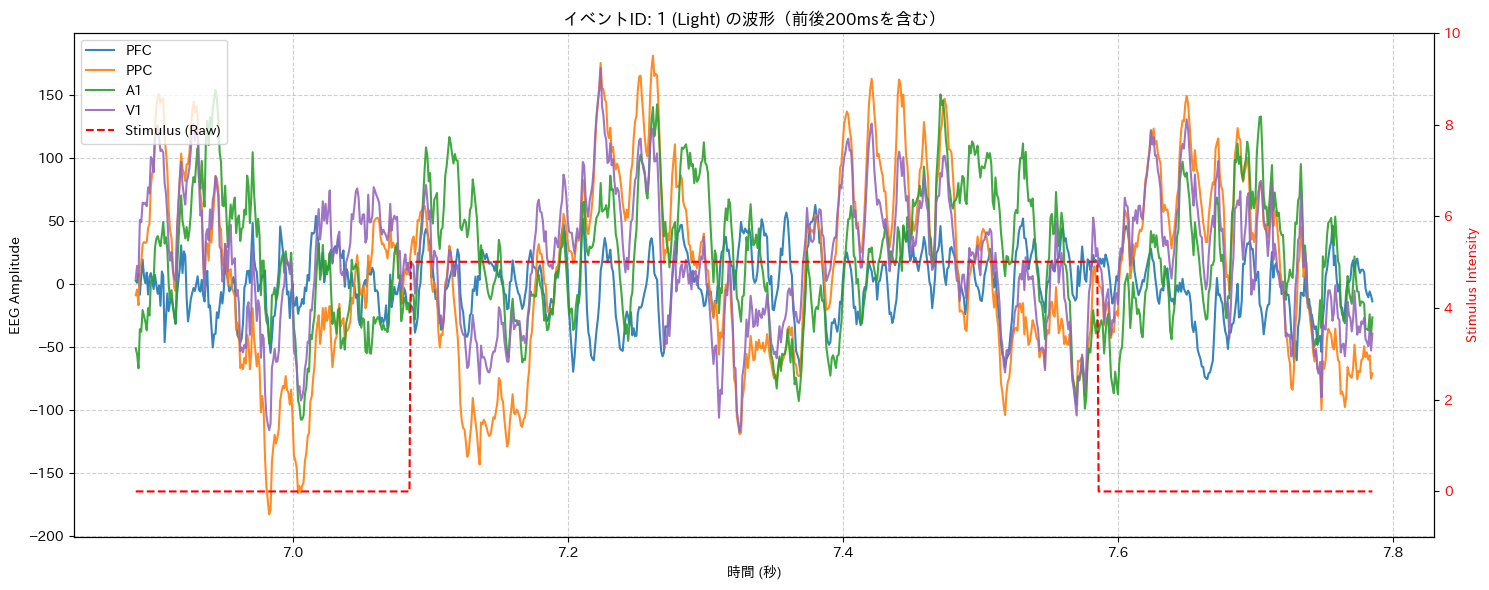


イベントID 601 の波形:


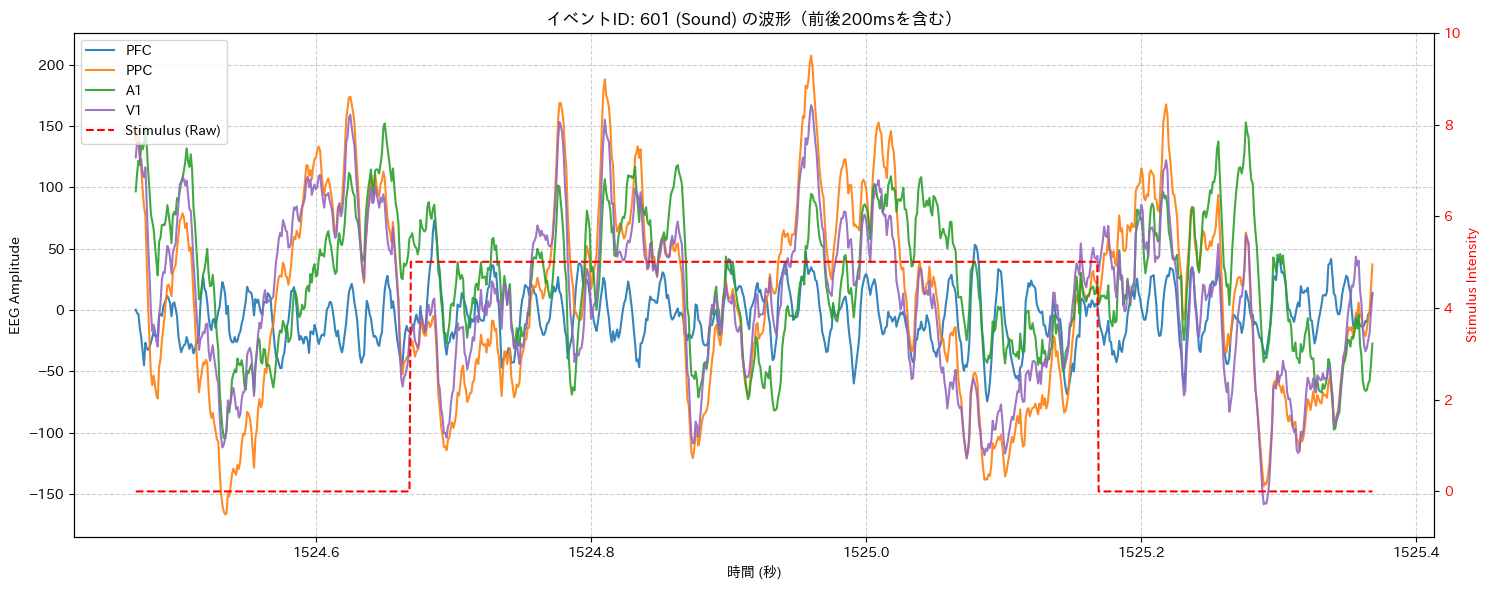


イベントID 1201 の波形:


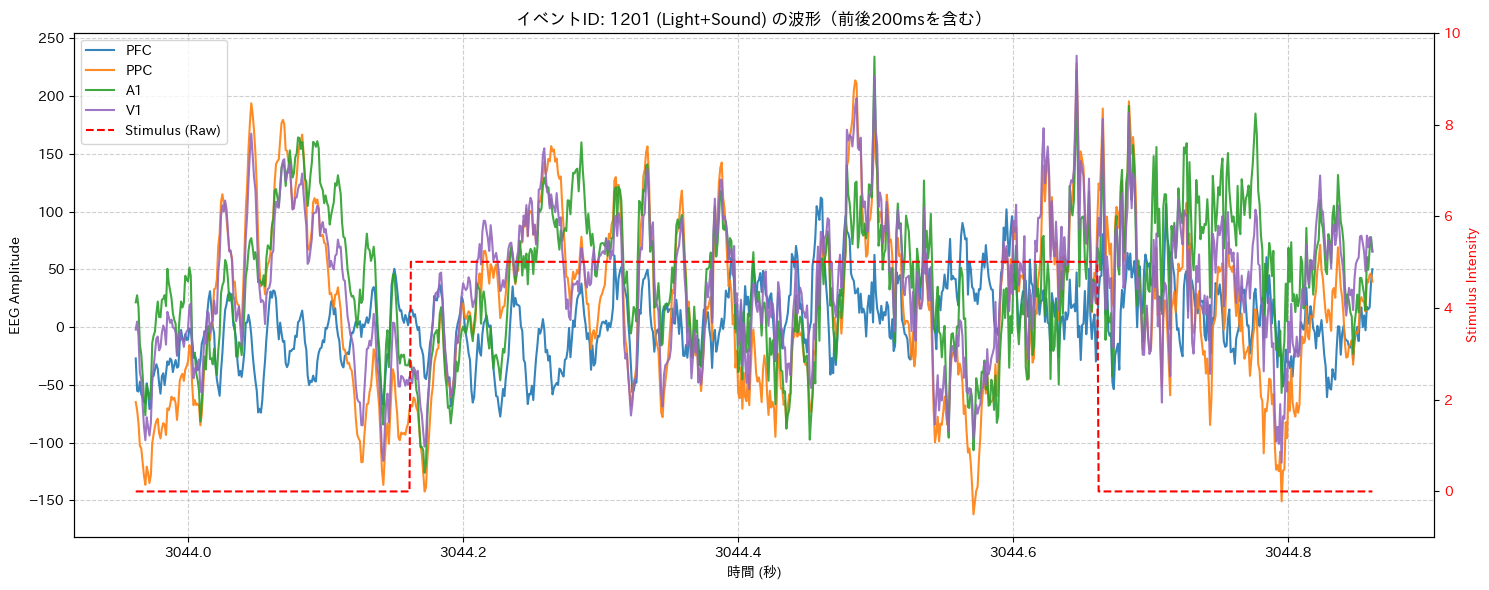

In [41]:
import matplotlib.pyplot as plt
import japanize_matplotlib # 日本語表示のため

# 特定の刺激イベントの波形を可視化する関数（再々修正版）
def plot_event_waveform(df, event_id, padding_ms=200):
    """
    指定されたイベントIDの前後区間を含めてプロットする。
    Stimulus信号は第2Y軸に元のスケールで表示する。
    """
    # イベントIDに該当する区間のデータを抽出
    event_df = df[df['Event_ID'] == event_id]
    
    if event_df.empty:
        print(f"イベントID {event_id} は見つかりませんでした。")
        return
        
    stim_type = event_df['Stimulus_Type'].iloc[0]
    
    # 前後区間を含めた表示範囲を計算
    padding_points = int(padding_ms)
    event_start_idx = event_df.index[0]
    event_end_idx = event_df.index[-1]
    plot_start_idx = max(0, event_start_idx - padding_points)
    plot_end_idx = min(len(df) - 1, event_end_idx + padding_points)
    plot_df = df.loc[plot_start_idx:plot_end_idx]
    
    # --- グラフ描画 ---
    fig, ax1 = plt.subplots(figsize=(15, 6))
    ax1.get_xaxis().get_major_formatter().set_useOffset(False) # X軸のオフセットを無効化

    # --- EEGチャネルのプロット (左のY軸) ---
    eeg_channels = ['PFC', 'PPC', 'A1', 'V1']
    # --- 変更点①: 元の固定色に戻す ---
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd'] 
    
    for i, channel in enumerate(eeg_channels):
        ax1.plot(plot_df['Time_s'], plot_df[channel], label=channel, color=colors[i], alpha=0.9)
    
    ax1.set_xlabel('時間 (秒)')
    ax1.set_ylabel('EEG Amplitude', color='black')
    ax1.grid(True, linestyle='--', alpha=0.6)

    # --- Stimulus信号を第2Y軸でプロット ---
    ax2 = ax1.twinx()
    ax2.plot(plot_df['Time_s'], plot_df['Stimulus'], label='Stimulus (Raw)', color='red', linestyle='--')
    ax2.set_ylabel('Stimulus Intensity', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_ylim(-1, max(df['Stimulus'].max(), 10))

    # --- 変更点②: 背景の帯表示を削除 ---
    # ax1.axvspan(...) の行を削除しました

    # --- 仕上げ ---
    plt.title(f'イベントID: {event_id} ({stim_type}) の波形（前後{padding_ms}msを含む）')
    
    # 凡例をまとめて表示
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    
    fig.tight_layout()
    plt.show()


# 1回目(Light)、601回目(Sound)、1201回目(Light+Sound)の刺激の波形を表示
target_events = [1, 601, 1201]
for event_id in target_events:
    print(f"\nイベントID {event_id} の波形:")
    plot_event_waveform(df, event_id, padding_ms=200)

インポートに成功しました！🎉

イベントID 1 の波形:


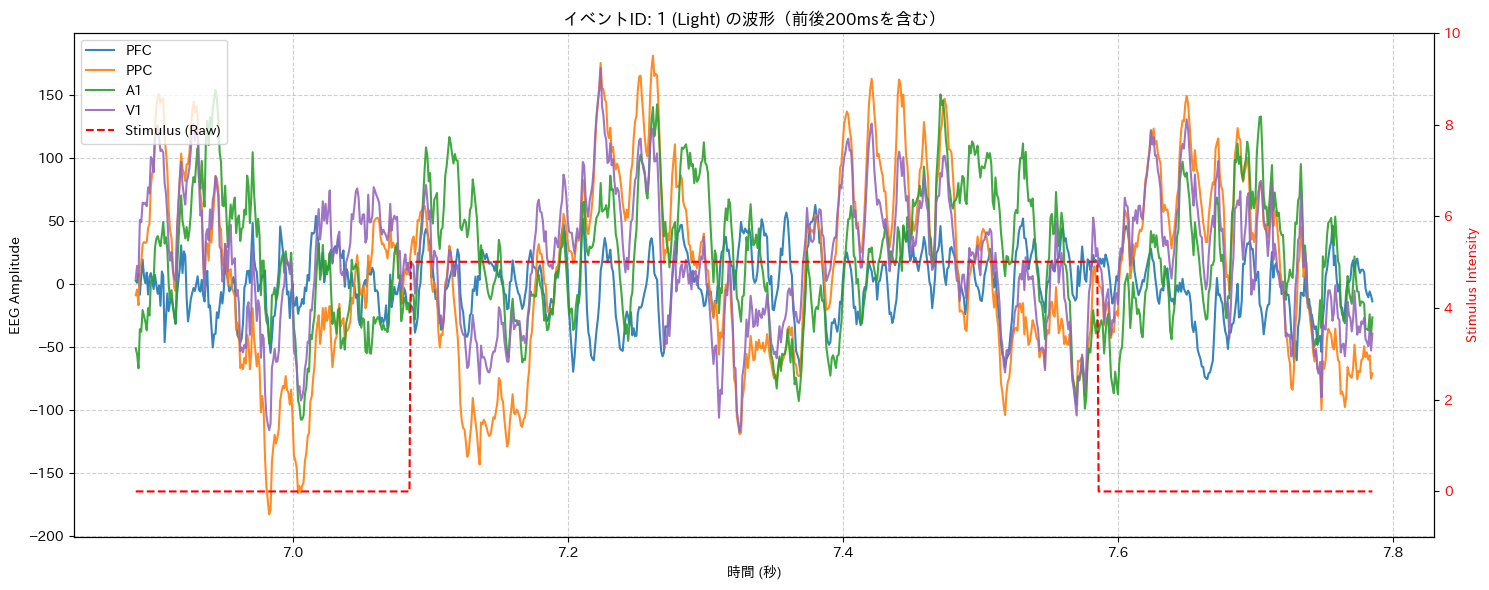


イベントID 601 の波形:


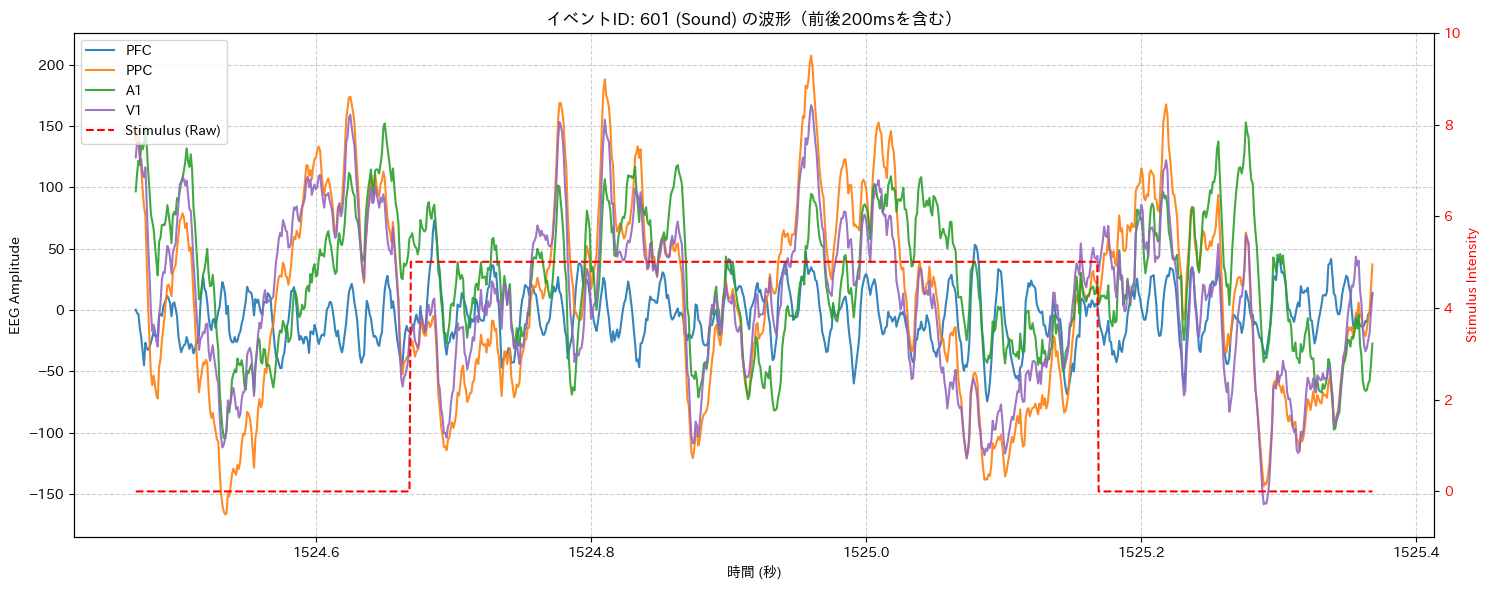


イベントID 1201 の波形:


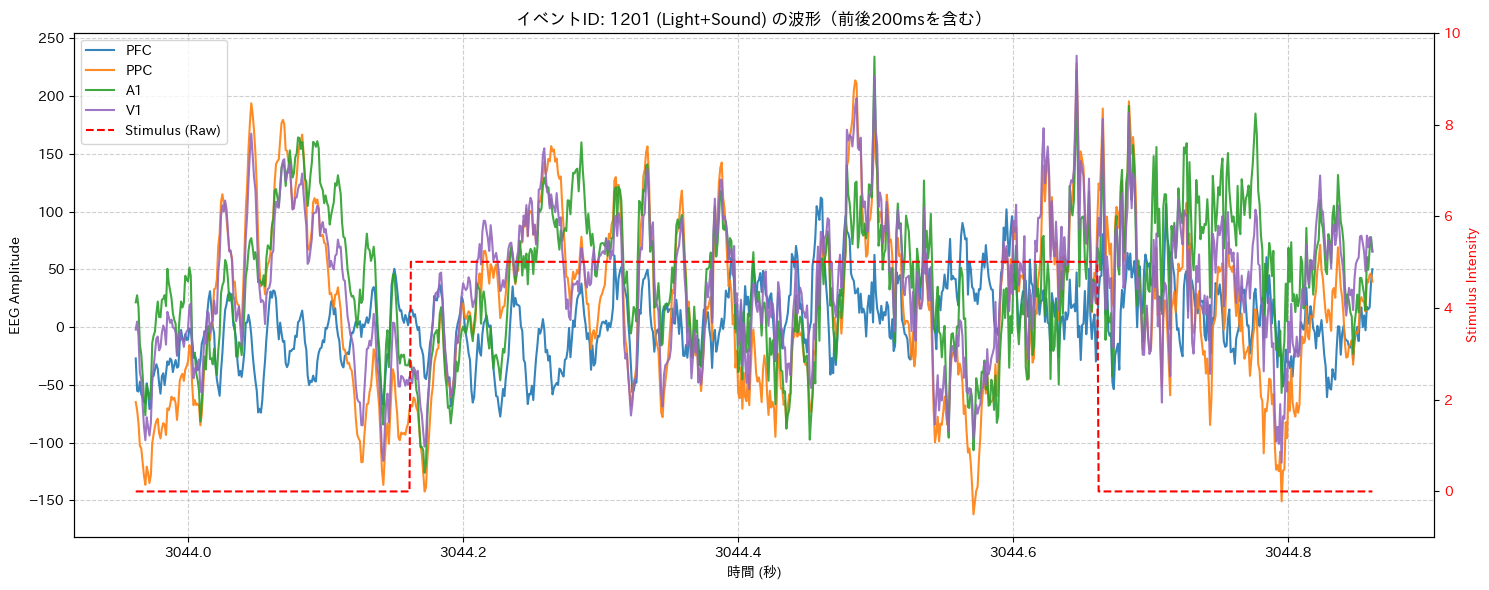

In [3]:
import sys
import os

# 'notebooks'ディレクトリから2つ上の階層（プロジェクトルート）のパスを取得
# このコードはどの環境でもプロジェクトルートを指すようにしてくれるので便利
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Pythonのモジュール検索パスリストにプロジェクトルートを追加
if project_root not in sys.path:
    sys.path.append(project_root)

# これでsrcからのインポートがうまくいくはず
from src.visualization import plot_event_waveform

# テスト
print("インポートに成功しました！🎉")
# srcフォルダのvisualization.pyから関数をインポート
from src.visualization import plot_event_waveform

# 1回目、601回目、1201回目...
target_events = [1, 601, 1201]
for event_id in target_events:
    print(f"\nイベントID {event_id} の波形:")
    plot_event_waveform(df, event_id, padding_ms=200) # 関数の呼び出し部分はそのまま